In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.ticker as ticker

In [7]:
import datetime as dt

In [8]:
from prophet import Prophet

In [9]:
# new try

In [28]:
#df2 = pd.read_csv("gemini_BTCUSD_day.csv", usecols = ['Date','Close'])
#df2 = pd.read_csv("gemini_ETHUSD_day.csv", usecols = ['Date','Close'])
df2 = pd.read_csv("gemini_LTCUSD_day.csv", usecols = ['Date','Close'])

In [29]:
df2.index = df2.index[::-1]

In [30]:
df2 = df2.reindex(index=df2.index[::-1])

In [31]:
df2['Date']


0       2018-10-16 04:00:00
1       2018-10-17 04:00:00
2       2018-10-18 04:00:00
3       2018-10-19 04:00:00
4       2018-10-20 04:00:00
               ...         
1204    2022-02-01 04:00:00
1205    2022-02-02 04:00:00
1206    2022-02-03 04:00:00
1207    2022-02-04 04:00:00
1208    2022-02-05 04:00:00
Name: Date, Length: 1209, dtype: object

In [32]:
df2.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [33]:
df2.head()

,ds,y
0,2018-10-16 04:00:00,52.92
1,2018-10-17 04:00:00,53.52
2,2018-10-18 04:00:00,51.88
3,2018-10-19 04:00:00,51.88
4,2018-10-20 04:00:00,52.75


In [34]:
model2 = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2.fit(df2)
future = model2.make_future_dataframe(periods = 365)
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1569,2023-02-01 04:00:00,59.177431,-89.709957,204.632156
1570,2023-02-02 04:00:00,59.995200,-94.039781,208.677061
1571,2023-02-03 04:00:00,60.915950,-91.661599,212.053540
1572,2023-02-04 04:00:00,61.922616,-96.408961,216.348057
1573,2023-02-05 04:00:00,62.996533,-96.237904,217.409388


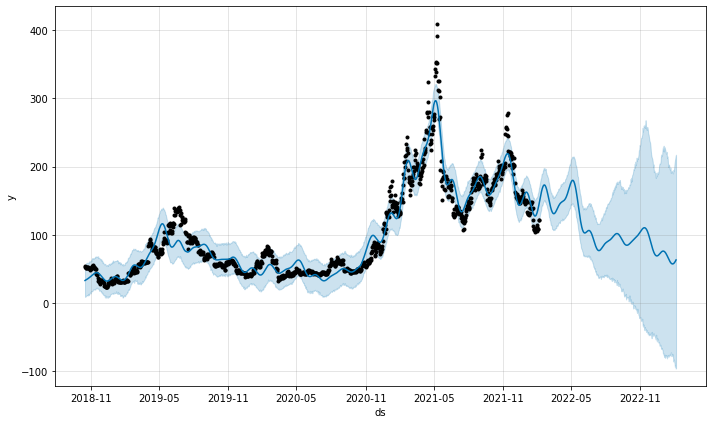

In [35]:
fig1 = model2.plot(forecast)

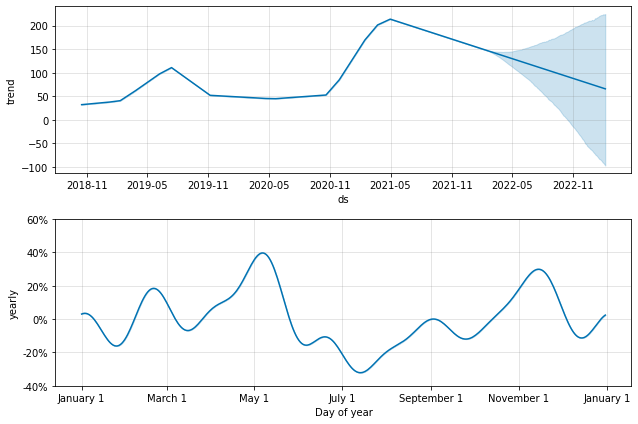

In [36]:
fig2 = model2.plot_components(forecast)